In [1]:
import pystan
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns.set(rc={'figure.figsize':(14, 10)})

## 16.2

### 16.2.1

In [3]:
df = pd.read_csv('data/stan_hangover.csv', index_col=0)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='date', ylabel='volume'>

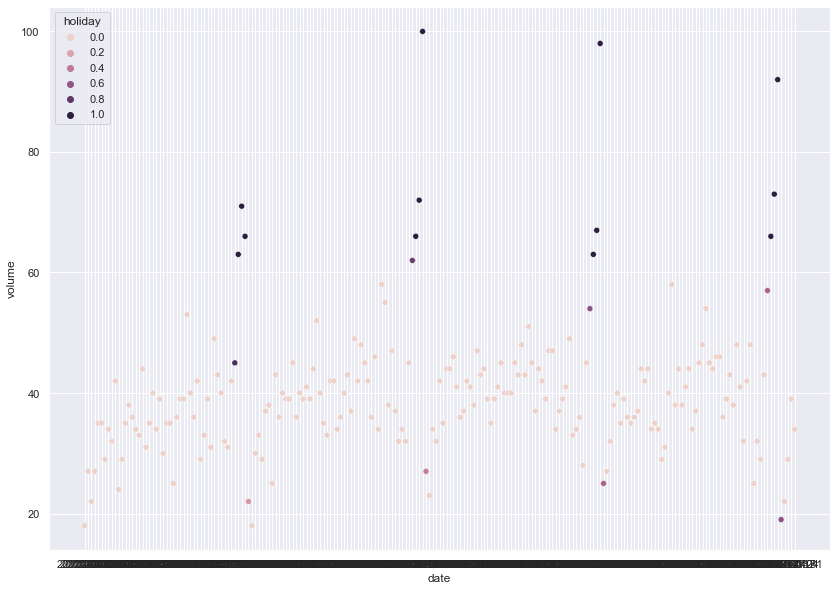

In [4]:
sns.scatterplot(data=df, x='date', y='volume', hue='holiday', )

### 16.2.2

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='date', ylabel='holiday'>

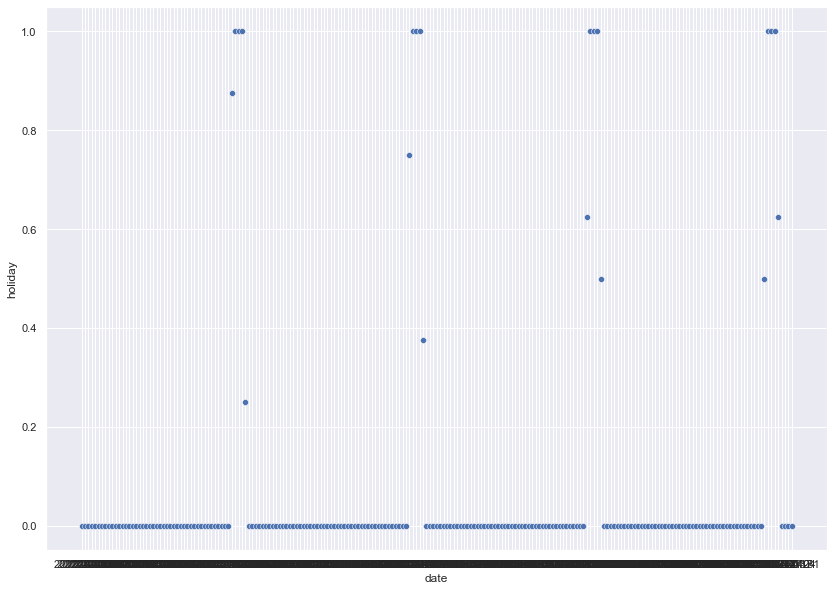

In [5]:
sns.scatterplot(data=df, x='date', y='holiday')

### 16.2.3

\begin{align}
{V_t} \sim \mathcal{N} (\beta_0+\beta_1 h_t, \sigma)
\end{align}

If there aren't holidays ($h_t==0$), distribution mean is $\beta_0$.

If there are holidays ($h_t==1$), distribution mean is $\beta_0 + \beta_1$.

Hence $\beta_0$ is average search in normal weeks, and $\beta_1$ is increase during holidays.

### 16.2.4

In [6]:
ocode = """data {
    int N;
    real holidays[N];
    real searches[N];
}

parameters {
    real b0;
    real b1;
    real<lower=0> sigma;
}

model {
    for(i in 1:N)
        searches[i] ~ normal(b0+holidays[i]*b1, sigma);
    b0 ~ normal(0, 
    50);
    b1 ~ normal(0, 50);
    sigma ~ normal(0, 10);
}

generated quantities{
    real increase;
    increase = b1 / b0;
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_47d69e4d5e0d186b8f2a7c7ce99dc1b5 NOW.


In [7]:
data = {'N': df.shape[0], 'holidays': df.holiday, 'searches': df.volume}

In [8]:
fit = sm.sampling(data=data, iter=5000, chains=4, seed=1)
fit

Inference for Stan model: anon_model_47d69e4d5e0d186b8f2a7c7ce99dc1b5.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b0        37.98  6.8e-3   0.64  36.74  37.56  37.98   38.4  39.26   8730    1.0
b1        30.91    0.03   2.39  26.18   29.3  30.94  32.52   35.6   7904    1.0
sigma      8.65  4.8e-3   0.43   7.87   8.35   8.63   8.94   9.53   8128    1.0
increase   0.81  7.9e-4   0.07   0.68   0.77   0.81   0.86   0.95   7456    1.0
lp__     -553.8    0.02   1.27 -557.1 -554.3 -553.5 -552.9 -552.4   5064    1.0

Samples were drawn using NUTS at Sat Dec 19 16:48:33 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

### 6.2B

Do the same, but use different parametrization.
\begin{align}
{V_t} \sim \mathcal{N} (\alpha_0(1-h_t)+\alpha_1 h_t, \sigma)
\end{align}

dd\begin{align}
{V_t} \sim \mathcal{N} (\beta_0+\beta_1 h_t, \sigma)
\end{align}

If there aren't holidays ($h_t==0$), distribution mean is $\alpha_0$.

If there are holidays ($h_t==1$), distribution mean is $\alpha_1$.

In [9]:
ocode = """data {
    int N;
    real holidays[N];
    real searches[N];
}

parameters {
    real a0;
    real a1;
    real<lower=0> sigma;
}

model {
    for(i in 1:N)
        searches[i] ~ normal(a0*(1-holidays[i]) + holidays[i]*a1, sigma);
    a0 ~ normal(0, 50);
    a1 ~ normal(0, 50);
    sigma ~ normal(0, 10);
}

generated quantities{
    real increase;
    increase = (a1-a0) / a0;
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ce3468f8ecb1c2e84c1fc1c7c22def NOW.


In [10]:
fit2 = sm.sampling(data=data, iter=5000, chains=4, seed=1)
fit2

Inference for Stan model: anon_model_05ce3468f8ecb1c2e84c1fc1c7c22def.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0        37.99  6.4e-3   0.63  36.72  37.57  37.99  38.42   39.2   9629    1.0
a1         68.8    0.02   2.23  64.42  67.29  68.83  70.31  73.19  10186    1.0
sigma      8.65  4.3e-3   0.43   7.86   8.36   8.63   8.94   9.56   9924    1.0
increase   0.81  6.8e-4   0.07   0.68   0.77   0.81   0.86   0.94   9779    1.0
lp__     -554.5    0.02   1.24 -557.8 -555.1 -554.2 -553.6 -553.1   4749    1.0

Samples were drawn using NUTS at Sat Dec 19 16:49:00 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

$\alpha_1$ should be equal $\beta_0 + \beta_1$

In [11]:
b0_mean = fit.summary()['summary'][0,0]
b1_mean = fit.summary()['summary'][1,0]
a0_mean = fit2.summary()['summary'][0,0]
a1_mean = fit2.summary()['summary'][1,0]

In [16]:
b0_mean, a0_mean

(37.98199203220392, 37.98727498922527)

In [13]:
b0_mean+b1_mean, a1_mean

(68.88725022254074, 68.80441714950501)